# Directory, Libraries and Data

In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
#load the data
df = pd.read_csv("CC GENERAL.csv").dropna() 
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


# Gaussian Mixture Model

In [4]:
#Creating DF without CustomerID
data = df.iloc[:,1:]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0.5, 0, 'number of components')

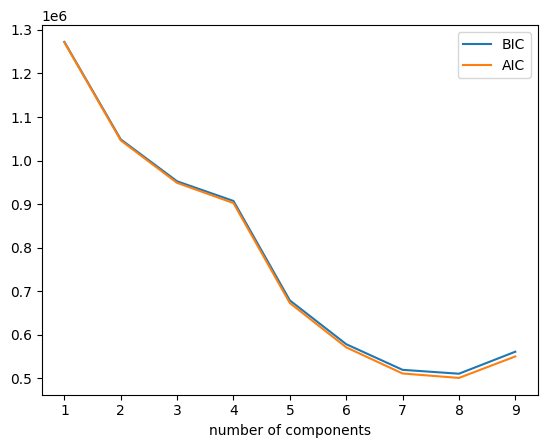

In [5]:
#Finding Optimal Number of clusters
n_components = np.arange(1,10)

#Model loop
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(data) for n in n_components]
#Plotting
plt.plot(n_components,
         [m.bic(data) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(data) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')

In [6]:
#Gaussian Mixture Model
model = GaussianMixture(n_components= 6,
                        random_state = 1502).fit(data)

# Interpretation

In [7]:
#Prediction
cluster = pd.Series(model.predict(data))
df['Cluster'] = cluster
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0


In [8]:
#how many people per cluster
df.Cluster.value_counts()

Cluster
5.0    2492
0.0    2159
1.0    1612
2.0    1118
4.0     802
3.0     156
Name: count, dtype: int64

In [9]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,1:-1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2143.186366,0.901955,23.255477,23.255477,0.000000,1977.915637,0.018499,0.018499,0.000000,0.276692,6.176874,0.235324,4062.461364,1666.297085,695.564697,0.045308,11.332922
1,158.722617,0.642591,683.362818,359.876196,323.486623,0.000000,0.525197,0.143156,0.385298,0.000000,0.000000,9.113565,3778.772076,898.014497,141.266865,0.330959,11.118327
2,3288.969311,1.000000,987.736856,576.357519,411.379338,1627.512369,0.617615,0.265545,0.453429,0.269308,6.287264,17.835744,5345.303861,1680.065451,1940.021886,0.000000,12.000000
3,476.030582,0.830602,877.014004,541.074906,353.436561,434.108431,0.612120,0.237332,0.414528,0.109829,1.734519,12.184823,4022.435343,1812.272220,275.730285,0.291445,11.616271
4,2464.040397,0.925334,2804.588270,1787.092425,1017.495845,2627.639939,0.676548,0.333834,0.499572,0.285576,8.623421,31.544592,5651.050497,4782.574317,2388.915153,0.129458,10.814577
5,1092.255601,1.000000,1568.527438,903.374395,665.153044,0.000000,0.772494,0.339661,0.596014,0.000000,0.000000,25.316067,4697.283040,1534.609068,535.198549,0.220648,12.000000


In [10]:
#Name the Segments
#Cluster 0: Lower Middle Class
#Cluster 1: Inactive 
#Cluster 2: High Rollers
#Cluster 3: Conscious high Income
#Cluster 4: Upper middle Class
#Cluster 5: Active purchasers